
SCR Peak Amplitudes by condition:
Empty-Bright: [ 0.40675731 32.61367466]
Empty-Dark: [0.22861166 0.38074463]
Full-Bright: [ 6.14519211 23.87720651]
Full-Dark: [25.55759563 15.82122174]


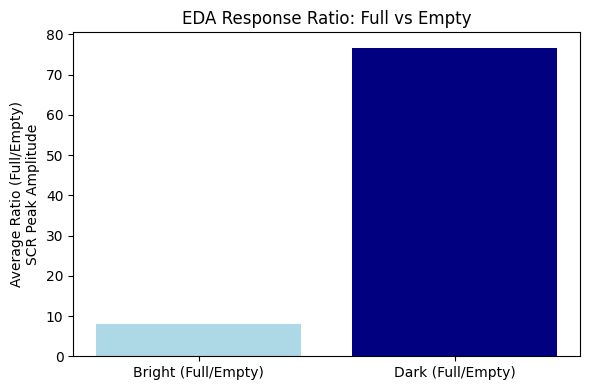

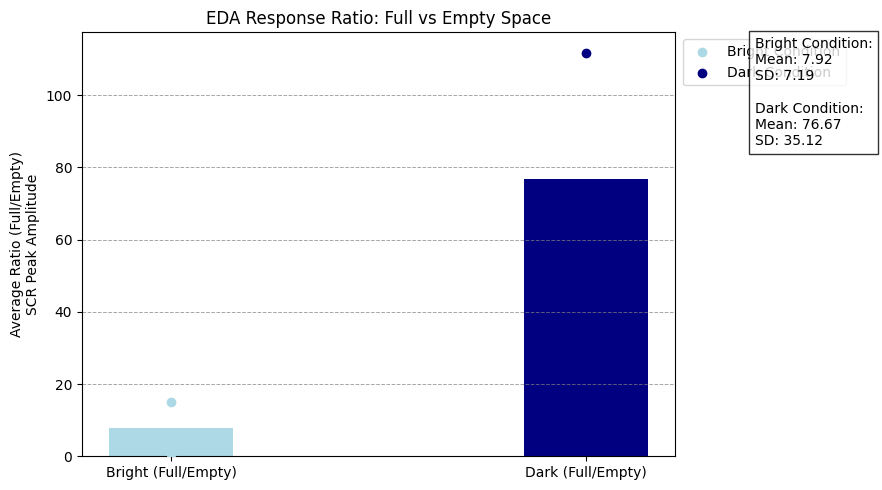


SCR Peak Amplitude Statistical Summary:

Bright Condition (Full/Empty):
Mean ratio: 7.920
Standard deviation: 7.188

Dark Condition (Full/Empty):
Mean ratio: 76.674
Standard deviation: 35.121

Additional EDA Metrics:

Number of SCR Peaks:
Empty-Bright: 28.0
Empty-Dark: 71.0
Full-Bright: 11.5
Full-Dark: 6.5

EDA Sympathetic Activity:
Empty-Bright: 2.053161
Empty-Dark: 0.136422
Full-Bright: 81.722743
Full-Dark: 37.015312


In [3]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Paths to folders
results_folder = '/Users/firefly/Desktop/Team_Messung/data/results'

# Load the results
filename = f"{results_folder}/eda_results.csv"
results = pd.read_csv(filename)

# Filter rows for each condition
empty_bright = results[results['Condition'] == 'empty_bright']
empty_dark = results[results['Condition'] == 'empty_dark']
full_bright = results[results['Condition'] == 'full_bright']
full_dark = results[results['Condition'] == 'full_dark']

# Extract SCR amplitude values for each condition
eda_empty_bright = empty_bright['SCR_Peaks_Amplitude_Mean']
eda_empty_dark = empty_dark['SCR_Peaks_Amplitude_Mean']
eda_full_bright = full_bright['SCR_Peaks_Amplitude_Mean']
eda_full_dark = full_dark['SCR_Peaks_Amplitude_Mean']

print("\nSCR Peak Amplitudes by condition:")
print("Empty-Bright:", eda_empty_bright.values)
print("Empty-Dark:", eda_empty_dark.values)
print("Full-Bright:", eda_full_bright.values)
print("Full-Dark:", eda_full_dark.values)

# Calculate ratios (Full/Empty)
ratio_bright = eda_full_bright.values / eda_empty_bright.values
ratio_dark = eda_full_dark.values / eda_empty_dark.values

# Calculate mean ratios
avg_ratio_bright = ratio_bright.mean()
avg_ratio_dark = ratio_dark.mean()

# Create first bar plot (simple averages)
plt.figure(figsize=(6, 4))
conditions = ['Bright (Full/Empty)', 'Dark (Full/Empty)']
averages = [avg_ratio_bright, avg_ratio_dark]
plt.bar(conditions, averages, color=['lightblue', 'navy'])
plt.ylabel('Average Ratio (Full/Empty)\nSCR Peak Amplitude')
plt.title('EDA Response Ratio: Full vs Empty')
plt.tight_layout()

# Save the simple bar plot
simple_plot_filename = f"{results_folder}/eda_summary_simple.png"
plt.savefig(simple_plot_filename, bbox_inches='tight', dpi=300)
plt.show()

# Create detailed bar plot with individual data points
fig, ax = plt.subplots(figsize=(8, 5))

# Create bars
bars = ax.bar(conditions, averages, color=['lightblue', 'navy'], width=0.3)

# Add individual data points
data_points_bright = [ratio for ratio in ratio_bright]
data_points_dark = [ratio for ratio in ratio_dark]

ax.scatter([0] * len(data_points_bright), data_points_bright, 
           color='lightblue', label='Bright Condition', zorder=5)
ax.scatter([1] * len(data_points_dark), data_points_dark, 
           color='navy', label='Dark Condition', zorder=5)

# Customize plot
ax.set_ylabel('Average Ratio (Full/Empty)\nSCR Peak Amplitude')
ax.set_title('EDA Response Ratio: Full vs Empty Space')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, 
        color='gray', alpha=0.7)

# Add statistical information
plt.figtext(0.95, 0.7,
            f"Bright Condition:\nMean: {avg_ratio_bright:.2f}\nSD: {np.std(ratio_bright):.2f}\n\n"
            f"Dark Condition:\nMean: {avg_ratio_dark:.2f}\nSD: {np.std(ratio_dark):.2f}",
            bbox=dict(facecolor='white', alpha=0.8))

# Save the detailed plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
detailed_plot_filename = f"{results_folder}/eda_summary_detailed.png"
plt.savefig(detailed_plot_filename, bbox_inches='tight', dpi=300)
plt.show()

# Print statistical summary
print("\nSCR Peak Amplitude Statistical Summary:")
print(f"\nBright Condition (Full/Empty):")
print(f"Mean ratio: {avg_ratio_bright:.3f}")
print(f"Standard deviation: {np.std(ratio_bright):.3f}")
print(f"\nDark Condition (Full/Empty):")
print(f"Mean ratio: {avg_ratio_dark:.3f}")
print(f"Standard deviation: {np.std(ratio_dark):.3f}")

# Additional EDA metrics summary
print("\nAdditional EDA Metrics:")
print("\nNumber of SCR Peaks:")
print(f"Empty-Bright: {empty_bright['SCR_Peaks_N'].mean():.1f}")
print(f"Empty-Dark: {empty_dark['SCR_Peaks_N'].mean():.1f}")
print(f"Full-Bright: {full_bright['SCR_Peaks_N'].mean():.1f}")
print(f"Full-Dark: {full_dark['SCR_Peaks_N'].mean():.1f}")

print("\nEDA Sympathetic Activity:")
print(f"Empty-Bright: {empty_bright['EDA_Sympathetic'].mean():.6f}")
print(f"Empty-Dark: {empty_dark['EDA_Sympathetic'].mean():.6f}")
print(f"Full-Bright: {full_bright['EDA_Sympathetic'].mean():.6f}")
print(f"Full-Dark: {full_dark['EDA_Sympathetic'].mean():.6f}")